## Introduction

This notebook builds a multi-class classification neural network that performs supervised machine learning on various cartographic variables to predict forest cover type (the most common tree cover).  

The data is provided by US Geological Survey and USFS, consisting of 30 x 30 meter areas across 4 wilderness areas in Roosevelt National Forest. There are minimal human disturbances in the areas considered, so forest cover types are mostly determined by ecological processes. 

## Import libraries

In [115]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Load data

In [78]:
data = pd.read_csv('cover_data.csv')

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [80]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


All features are in integer format, with soil types and wilderness areas as one-hot-encoded columns. There are 7 cover types to identify, located in the last column of the dataframe.

In [97]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

Given the assumption that ecological process are the main influencers of forest cover type for the areas represented, I initially considered dropping the `Horizontal_Distance_To_Roadways` and `Horizontal_Distance_To_Firepoints` columns that describe human activity. However, through further research I found that human activities like agriculture expansion, timber, etc. still greatly drive forest cover change. I decided to keep these two columns, because they offer insight into the frequency of these human activities in the areas observed. 

Source: https://environmentalsystemsresearch.springeropen.com/articles/10.1186/s40068-020-0163-z

## Prepare data

In [98]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Scale features to zero mean and unit variance
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Design Model

In [250]:
model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape = (X.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))
model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_222 (Dense)           (None, 64)                3520      
                                                                 
 dense_223 (Dense)           (None, 64)                4160      
                                                                 
 dense_224 (Dense)           (None, 32)                2080      
                                                                 
 dense_225 (Dense)           (None, 16)                528       
                                                                 
 dense_226 (Dense)           (None, 8)                 136       
                                                                 
Total params: 10,424
Trainable params: 10,424
Non-trainable params: 0
_________________________________________________________________


## Fit model

In [251]:
opt = Adam(learning_rate=0.01)
model.compile(loss = 'sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [252]:
stop = EarlyStopping(monitor='val_accuracy', mode='min', patience=20, verbose=1)
history = model.fit(X_train, y_train, epochs=100, batch_size=650, verbose=1, validation_split=0.15, callbacks=[stop])

Epoch 1/100
608/608 [==============================] - 3s 4ms/step - loss: 0.5795 - accuracy: 0.7547 - val_loss: 0.4799 - val_accuracy: 0.8011
Epoch 2/100
608/608 [==============================] - 2s 3ms/step - loss: 0.4470 - accuracy: 0.8113 - val_loss: 0.4177 - val_accuracy: 0.8254
Epoch 3/100
608/608 [==============================] - 2s 4ms/step - loss: 0.4084 - accuracy: 0.8292 - val_loss: 0.4034 - val_accuracy: 0.8314
Epoch 4/100
608/608 [==============================] - 2s 4ms/step - loss: 0.3767 - accuracy: 0.8430 - val_loss: 0.3710 - val_accuracy: 0.8467
Epoch 5/100
608/608 [==============================] - 2s 4ms/step - loss: 0.3579 - accuracy: 0.8523 - val_loss: 0.3492 - val_accuracy: 0.8566
Epoch 6/100
608/608 [==============================] - 3s 4ms/step - loss: 0.3450 - accuracy: 0.8579 - val_loss: 0.3495 - val_accuracy: 0.8560
Epoch 7/100
608/608 [==============================] - 3s 5ms/step - loss: 0.3354 - accuracy: 0.8621 - val_loss: 0.3397 - val_accuracy: 0.8611

## Evaluate model

In [253]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

3632/3632 [==============================] - 5s 1ms/step - loss: 0.2806 - accuracy: 0.8894
0.28059688210487366
0.8894176483154297


### Plot model performance

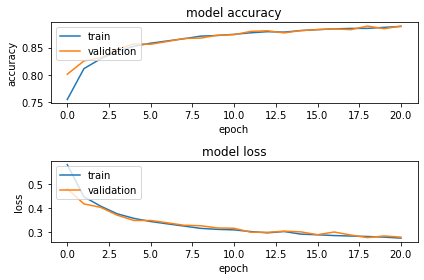

In [259]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

fig.tight_layout()
plt.show()

### Generate classification report

In [258]:
y_predicted = model.predict(X_test)
y_predicted = np.argmax(y_predicted, axis=1)
class_names = ['Spruce/Fir', 'Lodgepole Pine',
               'Ponderosa Pine', 'Cottonwood/Willow',
               'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(y_test, y_predicted, target_names=class_names))

3632/3632 [==============================] - 6s 2ms/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.89      0.89      0.89     42421
   Lodgepole Pine       0.90      0.91      0.91     56716
   Ponderosa Pine       0.87      0.86      0.86      7101
Cottonwood/Willow       0.81      0.65      0.72       546
            Aspen       0.70      0.64      0.67      1813
      Douglas-fir       0.77      0.71      0.74      3538
        Krummholz       0.90      0.89      0.90      4068

         accuracy                           0.89    116203
        macro avg       0.83      0.79      0.81    116203
     weighted avg       0.89      0.89      0.89    116203



### Plot heatmap

[Text(0, 0.5, 'Spruce/Fir'),
 Text(0, 1.5, 'Lodgepole Pine'),
 Text(0, 2.5, 'Ponderosa Pine'),
 Text(0, 3.5, 'Cottonwood/Willow'),
 Text(0, 4.5, 'Aspen'),
 Text(0, 5.5, 'Douglas-fir'),
 Text(0, 6.5, 'Krummholz')]

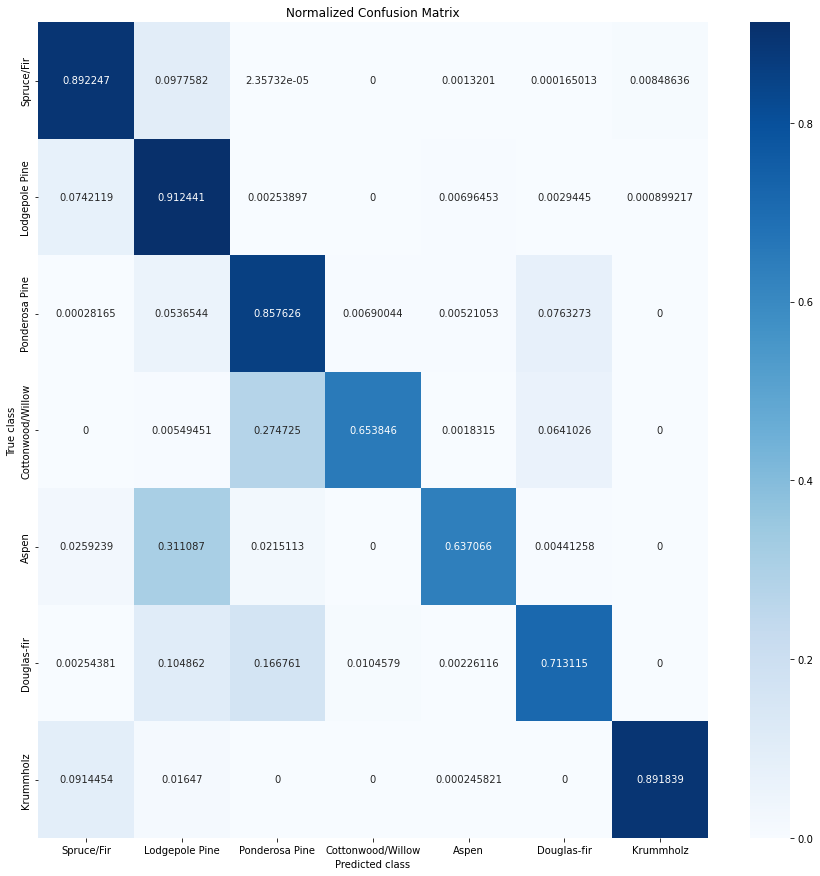

In [265]:
cm = confusion_matrix(y_test, y_predicted, normalize='true')
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

## Conclusion

Through hyperparameter tuning, the model reached an accuracy of 89% and loss of 0.28 on the test dataset. 

There were more misclassifications of Cottonwood/Willow, Aspen, Douglas-fir, which can be seen both in the heatmap and in the lower F1-scores. Further steps for this project include investigating similarities between confused cover types and removing outliers from the dataset. 